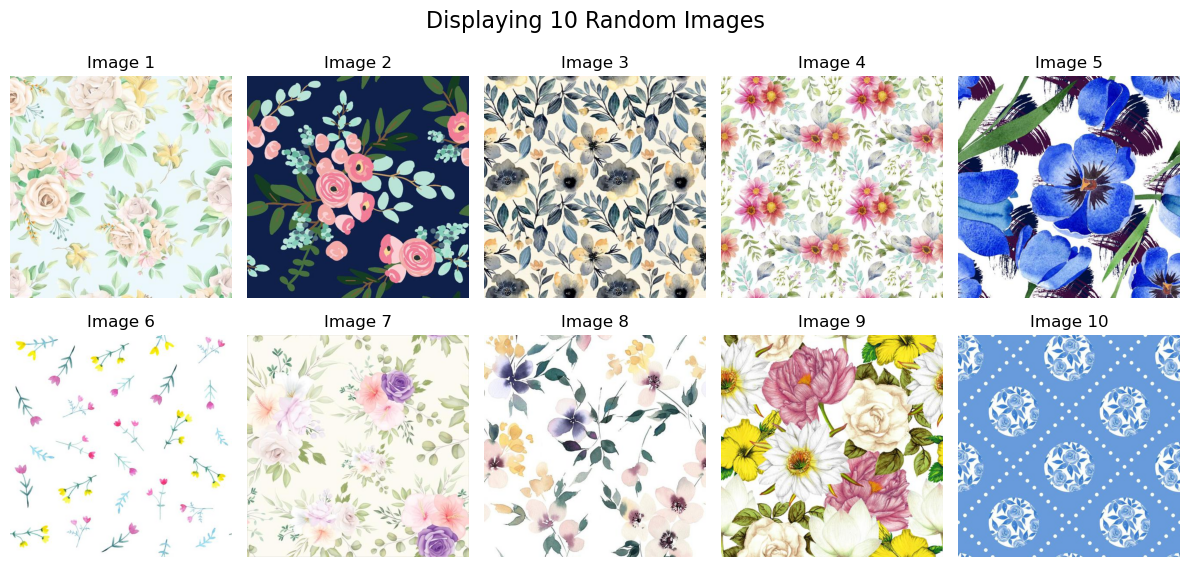

In [7]:
import os
import cv2
import random
import matplotlib.pyplot as plt

folder_path = "class"  # Replace with the path to your folder
num_images_to_display = 10

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found.")
else:
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp'))]

    # Shuffle the list of image files to make the selection random
    random.shuffle(image_files)

    # Initialize a list to store image data
    images = []
    for file_name in image_files[:num_images_to_display]:
        # Read each randomly selected image
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        
        # Append the image to the list
        if image is not None:
            images.append(image)

    # Display the randomly selected images in a grid
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # Create a 2x5 grid for images
    fig.suptitle('Displaying 10 Random Images', fontsize=16)

    for i in range(num_images_to_display):
        ax = axes[i // 5, i % 5]
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying in Matplotlib
        ax.set_title(f"Image {i+1}")
        ax.axis('off')  # Hide the axes

    # Hide any remaining empty subplots
    for i in range(num_images_to_display, 10):
        ax = axes[i // 5, i % 5]
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [2]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Function to extract VGG16 features from images
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = vgg_model.predict(img_data, verbose=0)
    return features.flatten()

# Path to the folder containing images
folder_path = "class"  # Replace with the path to your folder

# Check if the folder exists
if not os.path.exists(folder_path):
    print("Folder not found.")
else:
    # Load pre-trained VGG16 model
    vgg_model = VGG16(weights='imagenet', include_top=False)

    # Initialize lists to store image paths and feature vectors
    image_paths = []
    feature_vectors = []

    # Loop through images, extract features, and collect paths and feature vectors
    for file_name in os.listdir(folder_path)[:2500]:
        if file_name.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
            image_path = os.path.join(folder_path, file_name)
            image_paths.append(image_path)
            features = extract_features(image_path)
            feature_vectors.append(features)

    # Convert the list of feature vectors to a NumPy array
    feature_vectors = np.array(feature_vectors)

    # Optionally reduce dimensionality using PCA
    pca = PCA(n_components=100)  # You can change the number of components
    reduced_features = pca.fit_transform(feature_vectors)

    # Define the number of clusters (K)
    num_clusters = 8  # Change this according to your requirement

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(reduced_features)
    cluster_labels = kmeans.labels_

    # Assign images to their respective clusters
    clusters = {i: [] for i in range(num_clusters)}
    for i, label in enumerate(cluster_labels):
        clusters[label].append(image_paths[i])




Cluster 1 - Total images: 464
Sample images from Cluster 1:


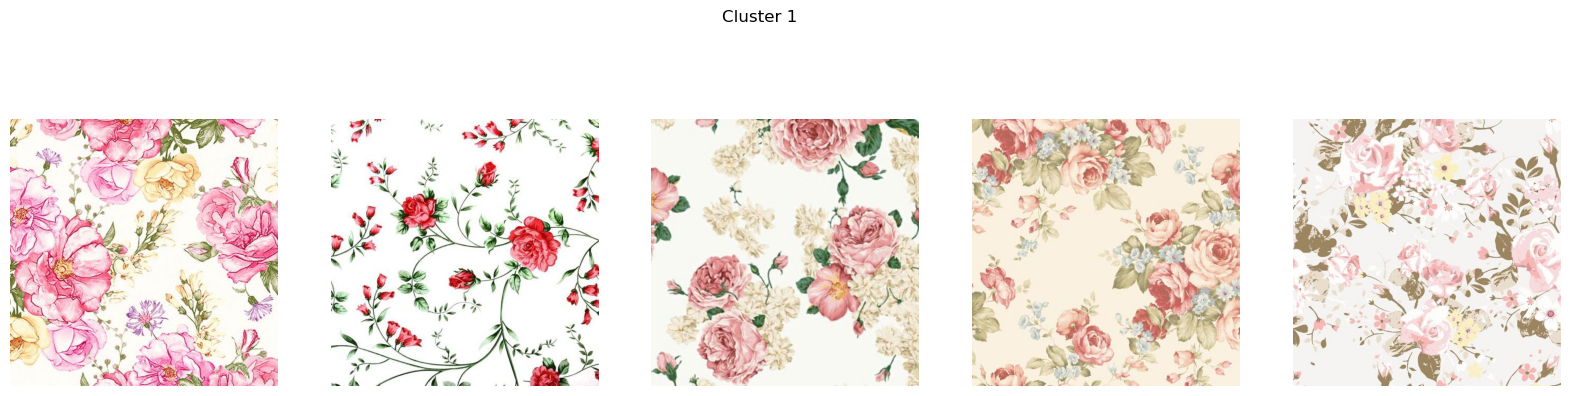

Cluster 2 - Total images: 302
Sample images from Cluster 2:


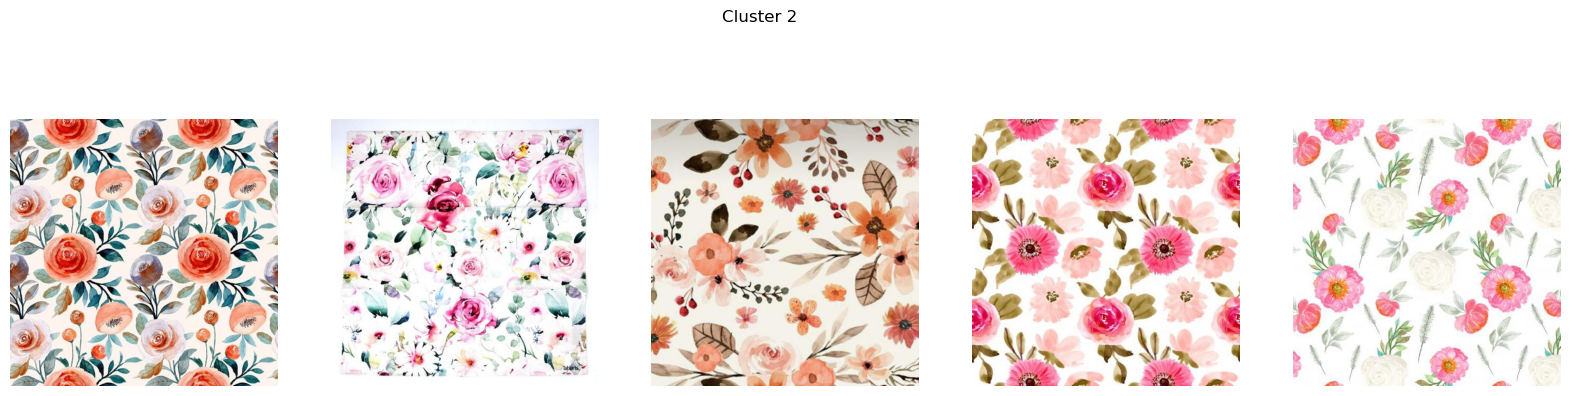

Cluster 3 - Total images: 332
Sample images from Cluster 3:


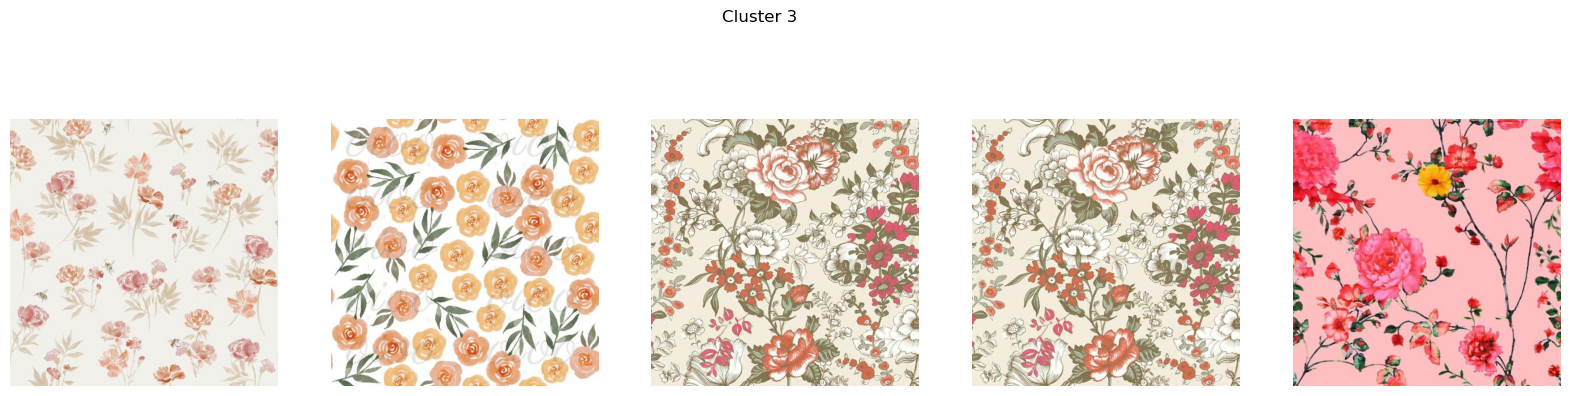

Cluster 4 - Total images: 258
Sample images from Cluster 4:


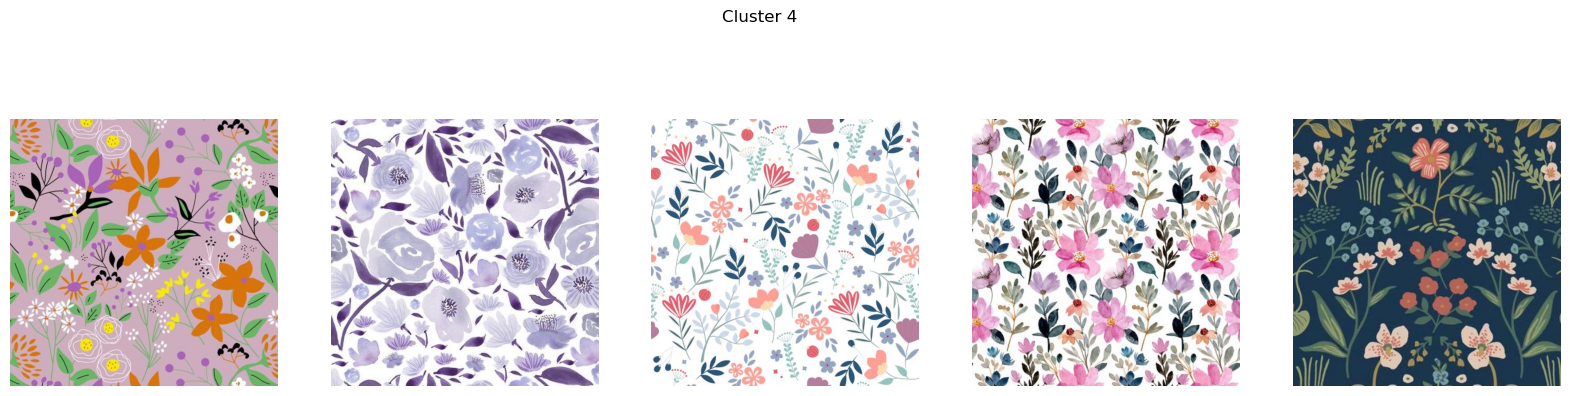

Cluster 5 - Total images: 209
Sample images from Cluster 5:


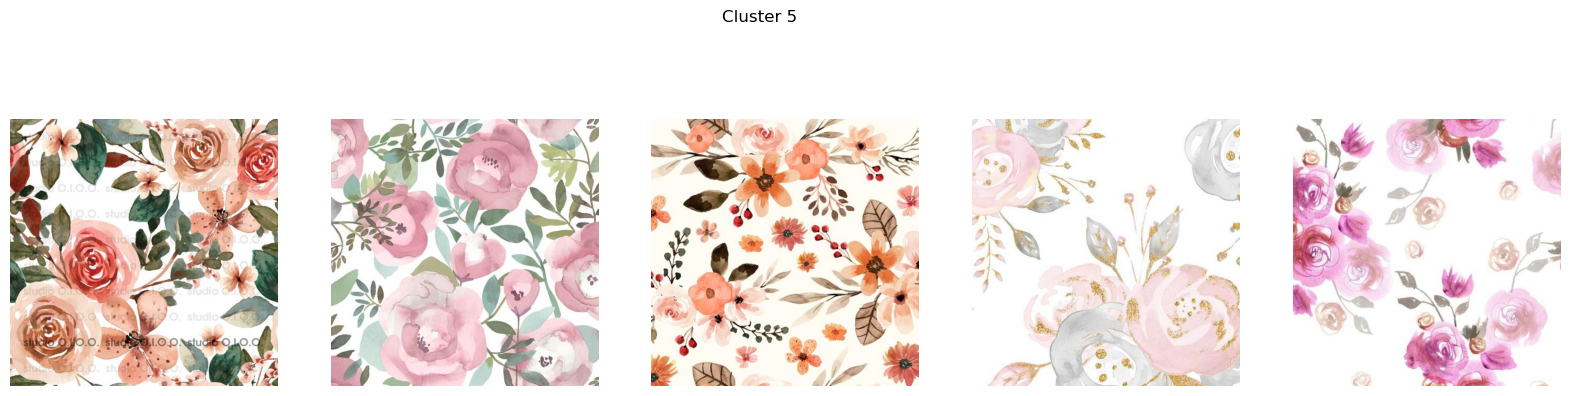

Cluster 6 - Total images: 492
Sample images from Cluster 6:


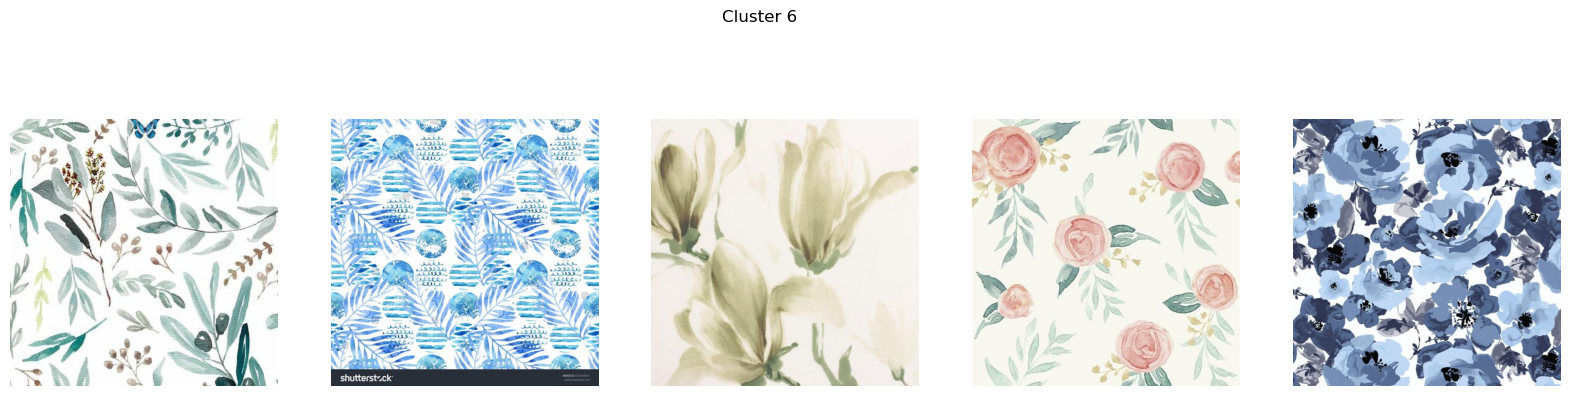

Cluster 7 - Total images: 228
Sample images from Cluster 7:


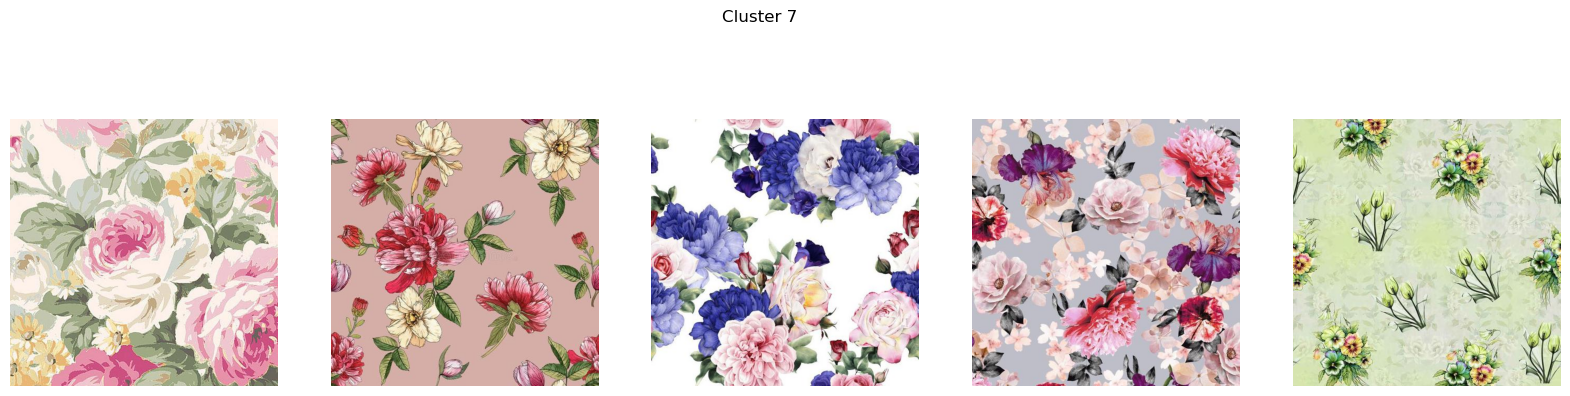

Cluster 8 - Total images: 215
Sample images from Cluster 8:


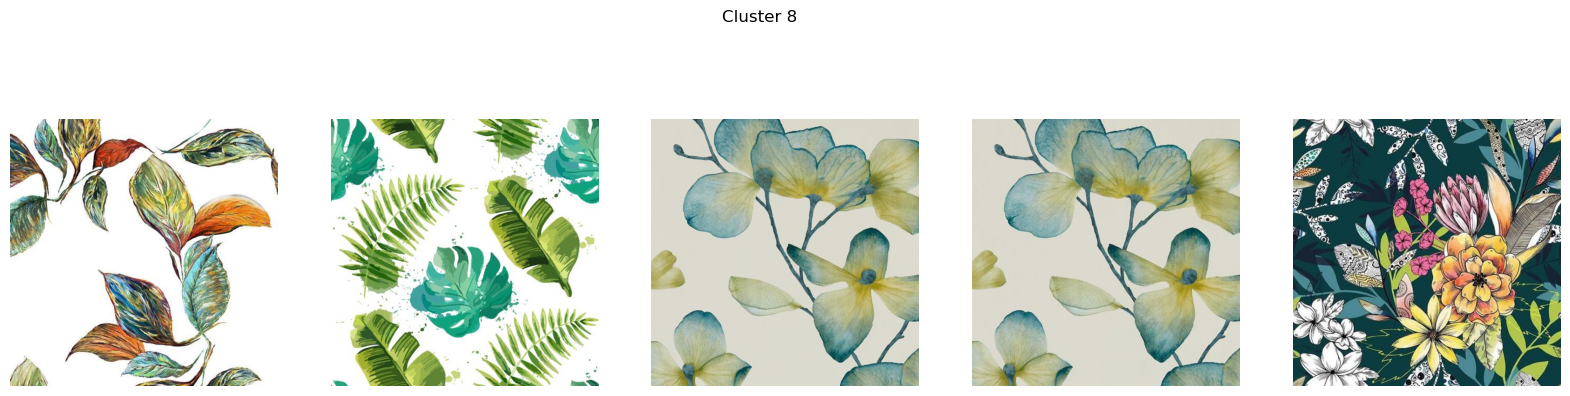

Clustering completed with 8 clusters.


In [3]:
for cluster, images in clusters.items():
    print(f"Cluster {cluster + 1} - Total images: {len(images)}")  # Print total number of images in the cluster
    print(f"Sample images from Cluster {cluster + 1}:")
    sample_images = images[:5]  # Select the first 5 images from each cluster or all available images if less than 5
    plt.figure(figsize=(20, 5))
    plt.suptitle(f"Cluster {cluster + 1}")

    # If the number of available images in the cluster is less than 5, adjust the number of subplots
    num_images = len(sample_images)
    if num_images < 5:
        plt.subplots_adjust(wspace=0.5)
        for i in range(5):
            if i < num_images:
                img_path = sample_images[i]
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.subplot(1, 5, i + 1)
                plt.imshow(img)
                plt.axis('off')
            else:
                plt.subplot(1, 5, i + 1)
                plt.axis('off')
    else:
        for i, img_path in enumerate(sample_images):
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

print(f"Clustering completed with {len(clusters)} clusters.")
